In [1]:
   #import os and getting working directory
    import os
    os.getcwd()

'/home/jovyan'

In [2]:
#Loading different startup packages and libraries with loading dataset.
try:
    from collections import OrderedDict
except ImportError:
    from ordereddict import OrderedDict
    
import pandas as pd

# Array
import numpy as np

# Decompress the file
import gzip

# Visualizations
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import matplotlib.colors as colors
%matplotlib inline

# Datetime
from datetime import datetime

## Warnings
import warnings
from scipy import stats
warnings.filterwarnings('ignore')

# Loan clean dataset
import dask.bag as db
Cleanreview_df = pd.read_csv('musicreviews_clean.csv' )

In [3]:
#Dropping the review time attribute in order to view plot. 
df = Cleanreview_df.drop(['unixReviewTime'], axis = 1)

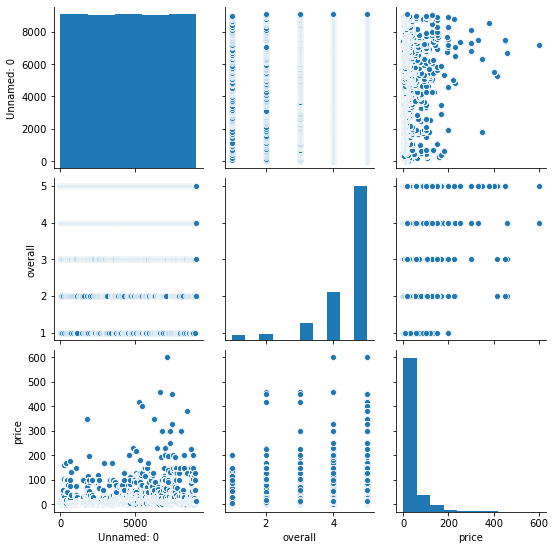

In [4]:
sns.pairplot(df)

In [5]:
#Review head of dataset
Cleanreview_df.head()

,Unnamed: 0,reviewerID,asin,helpful,overall,unixReviewTime,title,price,imUrl,categories,...,Full_Review_str,tokenized,lower,langs,no_punc,stopwords_removed,pos_tags,wordnet_pos,lemmatized,lemma_str
0,0,A2IBPI20UZIR0U,1384719342,"[0, 0]",5,1393545600,niceEshop Studio Microphone Mic Wind Screen Po...,7.09,http://ecx.images-amazon.com/images/I/510D2cVp...,"[['Musical Instruments', 'Microphones & Access...",...,"good Not much to write about here, but it does...","['good', 'Not', 'much', 'to', 'write', 'about'...","['good', 'not', 'much', 'to', 'write', 'about'...",en,"['good', 'not', 'much', 'to', 'write', 'about'...","['good', 'much', 'write', 'exactly', 'supposed...","[('good', 'JJ'), ('much', 'RB'), ('write', 'VB...","[('good', 'a'), ('much', 'r'), ('write', 'v'),...","['good', 'much', 'write', 'exactly', 'suppose'...",good much write exactly suppose filter pop sou...
1,1,A14VAT5EAX3D9S,1384719342,"[13, 14]",5,1363392000,niceEshop Studio Microphone Mic Wind Screen Po...,7.09,http://ecx.images-amazon.com/images/I/510D2cVp...,"[['Musical Instruments', 'Microphones & Access...",...,Jake The product does exactly as it should and...,"['Jake', 'The', 'product', 'does', 'exactly', ...","['jake', 'the', 'product', 'does', 'exactly', ...",en,"['jake', 'the', 'product', 'does', 'exactly', ...","['jake', 'product', 'exactly', 'quite', 'affor...","[('jake', 'NN'), ('product', 'NN'), ('exactly'...","[('jake', 'n'), ('product', 'n'), ('exactly', ...","['jake', 'product', 'exactly', 'quite', 'affor...",jake product exactly quite affordable.i realiz...
2,2,A195EZSQDW3E21,1384719342,"[1, 1]",5,1377648000,niceEshop Studio Microphone Mic Wind Screen Po...,7.09,http://ecx.images-amazon.com/images/I/510D2cVp...,"[['Musical Instruments', 'Microphones & Access...",...,It Does The Job Well The primary job of this d...,"['It', 'Does', 'The', 'Job', 'Well', 'The', 'p...","['it', 'does', 'the', 'job', 'well', 'the', 'p...",en,"['it', 'does', 'the', 'job', 'well', 'the', 'p...","['job', 'well', 'primary', 'job', 'device', 'b...","[('job', 'NN'), ('well', 'RB'), ('primary', 'J...","[('job', 'n'), ('well', 'r'), ('primary', 'a')...","['job', 'well', 'primary', 'job', 'device', 'b...",job well primary job device block breath would...
3,3,A2C00NNG1ZQQG2,1384719342,"[0, 0]",5,1392336000,niceEshop Studio Microphone Mic Wind Screen Po...,7.09,http://ecx.images-amazon.com/images/I/510D2cVp...,"[['Musical Instruments', 'Microphones & Access...",...,GOOD WINDSCREEN FOR THE MONEY Nice windscreen ...,"['GOOD', 'WINDSCREEN', 'FOR', 'THE', 'MONEY', ...","['good', 'windscreen', 'for', 'the', 'money', ...",en,"['good', 'windscreen', 'for', 'the', 'money', ...","['good', 'windscreen', 'money', 'nice', 'winds...","[('good', 'JJ'), ('windscreen', 'NN'), ('money...","[('good', 'a'), ('windscreen', 'n'), ('money',...","['good', 'windscreen', 'money', 'nice', 'winds...",good windscreen money nice windscreen protects...
4,4,A94QU4C90B1AX,1384719342,"[0, 0]",5,1392940800,niceEshop Studio Microphone Mic Wind Screen Po...,7.09,http://ecx.images-amazon.com/images/I/510D2cVp...,"[['Musical Instruments', 'Microphones & Access...",...,No more pops when I record my vocals. This pop...,"['No', 'more', 'pops', 'when', 'I', 'record', ...","['no', 'more', 'pops', 'when', 'i', 'record', ...",en,"['no', 'more', 'pops', 'when', 'i', 'record', ...","['pops', 'record', 'vocals', 'pop', 'filter', ...","[('pops', 'NNS'), ('record', 'NN'), ('vocals',...","[('pops', 'n'), ('record', 'n'), ('vocals', 'n...","['pop', 'record', 'vocal', 'pop', 'filter', 'g...",pop record vocal pop filter great look perform...


In [6]:
#Review attribute info with data types of the dataframe
Cleanreview_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         9093 non-null   int64  
 1   reviewerID         9093 non-null   object 
 2   asin               9093 non-null   object 
 3   helpful            9093 non-null   object 
 4   overall            9093 non-null   int64  
 5   unixReviewTime     9093 non-null   int64  
 6   title              9093 non-null   object 
 7   price              9093 non-null   float64
 8   imUrl              9093 non-null   object 
 9   categories         9093 non-null   object 
 10  brand              9093 non-null   object 
 11  Full Review        9093 non-null   object 
 12  Rating             9093 non-null   object 
 13  time               9093 non-null   object 
 14  contracted         9093 non-null   object 
 15  Full_Review_str    9093 non-null   object 
 16  tokenized          9093 

In [7]:
#Count of cases by group of rating for good , bad and neutal
Counts=Cleanreview_df.groupby(['Rating']).size()
print(Counts)

Rating
bad      419
good    8674
dtype: int64


In [8]:
#Application of ratings to the data frame and review of dataframe 
Cleanreview_df['Rating'] = Cleanreview_df['overall'].apply(lambda x: 'bad' if x < 3  else ('neutral' if x  < 4 else 'good'))
Cleanreview_df.head()

,Unnamed: 0,reviewerID,asin,helpful,overall,unixReviewTime,title,price,imUrl,categories,...,Full_Review_str,tokenized,lower,langs,no_punc,stopwords_removed,pos_tags,wordnet_pos,lemmatized,lemma_str
0,0,A2IBPI20UZIR0U,1384719342,"[0, 0]",5,1393545600,niceEshop Studio Microphone Mic Wind Screen Po...,7.09,http://ecx.images-amazon.com/images/I/510D2cVp...,"[['Musical Instruments', 'Microphones & Access...",...,"good Not much to write about here, but it does...","['good', 'Not', 'much', 'to', 'write', 'about'...","['good', 'not', 'much', 'to', 'write', 'about'...",en,"['good', 'not', 'much', 'to', 'write', 'about'...","['good', 'much', 'write', 'exactly', 'supposed...","[('good', 'JJ'), ('much', 'RB'), ('write', 'VB...","[('good', 'a'), ('much', 'r'), ('write', 'v'),...","['good', 'much', 'write', 'exactly', 'suppose'...",good much write exactly suppose filter pop sou...
1,1,A14VAT5EAX3D9S,1384719342,"[13, 14]",5,1363392000,niceEshop Studio Microphone Mic Wind Screen Po...,7.09,http://ecx.images-amazon.com/images/I/510D2cVp...,"[['Musical Instruments', 'Microphones & Access...",...,Jake The product does exactly as it should and...,"['Jake', 'The', 'product', 'does', 'exactly', ...","['jake', 'the', 'product', 'does', 'exactly', ...",en,"['jake', 'the', 'product', 'does', 'exactly', ...","['jake', 'product', 'exactly', 'quite', 'affor...","[('jake', 'NN'), ('product', 'NN'), ('exactly'...","[('jake', 'n'), ('product', 'n'), ('exactly', ...","['jake', 'product', 'exactly', 'quite', 'affor...",jake product exactly quite affordable.i realiz...
2,2,A195EZSQDW3E21,1384719342,"[1, 1]",5,1377648000,niceEshop Studio Microphone Mic Wind Screen Po...,7.09,http://ecx.images-amazon.com/images/I/510D2cVp...,"[['Musical Instruments', 'Microphones & Access...",...,It Does The Job Well The primary job of this d...,"['It', 'Does', 'The', 'Job', 'Well', 'The', 'p...","['it', 'does', 'the', 'job', 'well', 'the', 'p...",en,"['it', 'does', 'the', 'job', 'well', 'the', 'p...","['job', 'well', 'primary', 'job', 'device', 'b...","[('job', 'NN'), ('well', 'RB'), ('primary', 'J...","[('job', 'n'), ('well', 'r'), ('primary', 'a')...","['job', 'well', 'primary', 'job', 'device', 'b...",job well primary job device block breath would...
3,3,A2C00NNG1ZQQG2,1384719342,"[0, 0]",5,1392336000,niceEshop Studio Microphone Mic Wind Screen Po...,7.09,http://ecx.images-amazon.com/images/I/510D2cVp...,"[['Musical Instruments', 'Microphones & Access...",...,GOOD WINDSCREEN FOR THE MONEY Nice windscreen ...,"['GOOD', 'WINDSCREEN', 'FOR', 'THE', 'MONEY', ...","['good', 'windscreen', 'for', 'the', 'money', ...",en,"['good', 'windscreen', 'for', 'the', 'money', ...","['good', 'windscreen', 'money', 'nice', 'winds...","[('good', 'JJ'), ('windscreen', 'NN'), ('money...","[('good', 'a'), ('windscreen', 'n'), ('money',...","['good', 'windscreen', 'money', 'nice', 'winds...",good windscreen money nice windscreen protects...
4,4,A94QU4C90B1AX,1384719342,"[0, 0]",5,1392940800,niceEshop Studio Microphone Mic Wind Screen Po...,7.09,http://ecx.images-amazon.com/images/I/510D2cVp...,"[['Musical Instruments', 'Microphones & Access...",...,No more pops when I record my vocals. This pop...,"['No', 'more', 'pops', 'when', 'I', 'record', ...","['no', 'more', 'pops', 'when', 'i', 'record', ...",en,"['no', 'more', 'pops', 'when', 'i', 'record', ...","['pops', 'record', 'vocals', 'pop', 'filter', ...","[('pops', 'NNS'), ('record', 'NN'), ('vocals',...","[('pops', 'n'), ('record', 'n'), ('vocals', 'n...","['pop', 'record', 'vocal', 'pop', 'filter', 'g...",pop record vocal pop filter great look perform...


In [9]:
#df['date'].dt.year
Cleanreview_df['ReviewDate'] = pd.to_datetime(Cleanreview_df['time'])

Cleanreview_df['ReviewYear'] = Cleanreview_df['ReviewDate'].dt.year
Cleanreview_df.head()

,Unnamed: 0,reviewerID,asin,helpful,overall,unixReviewTime,title,price,imUrl,categories,...,lower,langs,no_punc,stopwords_removed,pos_tags,wordnet_pos,lemmatized,lemma_str,ReviewDate,ReviewYear
0,0,A2IBPI20UZIR0U,1384719342,"[0, 0]",5,1393545600,niceEshop Studio Microphone Mic Wind Screen Po...,7.09,http://ecx.images-amazon.com/images/I/510D2cVp...,"[['Musical Instruments', 'Microphones & Access...",...,"['good', 'not', 'much', 'to', 'write', 'about'...",en,"['good', 'not', 'much', 'to', 'write', 'about'...","['good', 'much', 'write', 'exactly', 'supposed...","[('good', 'JJ'), ('much', 'RB'), ('write', 'VB...","[('good', 'a'), ('much', 'r'), ('write', 'v'),...","['good', 'much', 'write', 'exactly', 'suppose'...",good much write exactly suppose filter pop sou...,2014-02-28,2014
1,1,A14VAT5EAX3D9S,1384719342,"[13, 14]",5,1363392000,niceEshop Studio Microphone Mic Wind Screen Po...,7.09,http://ecx.images-amazon.com/images/I/510D2cVp...,"[['Musical Instruments', 'Microphones & Access...",...,"['jake', 'the', 'product', 'does', 'exactly', ...",en,"['jake', 'the', 'product', 'does', 'exactly', ...","['jake', 'product', 'exactly', 'quite', 'affor...","[('jake', 'NN'), ('product', 'NN'), ('exactly'...","[('jake', 'n'), ('product', 'n'), ('exactly', ...","['jake', 'product', 'exactly', 'quite', 'affor...",jake product exactly quite affordable.i realiz...,2013-03-16,2013
2,2,A195EZSQDW3E21,1384719342,"[1, 1]",5,1377648000,niceEshop Studio Microphone Mic Wind Screen Po...,7.09,http://ecx.images-amazon.com/images/I/510D2cVp...,"[['Musical Instruments', 'Microphones & Access...",...,"['it', 'does', 'the', 'job', 'well', 'the', 'p...",en,"['it', 'does', 'the', 'job', 'well', 'the', 'p...","['job', 'well', 'primary', 'job', 'device', 'b...","[('job', 'NN'), ('well', 'RB'), ('primary', 'J...","[('job', 'n'), ('well', 'r'), ('primary', 'a')...","['job', 'well', 'primary', 'job', 'device', 'b...",job well primary job device block breath would...,2013-08-28,2013
3,3,A2C00NNG1ZQQG2,1384719342,"[0, 0]",5,1392336000,niceEshop Studio Microphone Mic Wind Screen Po...,7.09,http://ecx.images-amazon.com/images/I/510D2cVp...,"[['Musical Instruments', 'Microphones & Access...",...,"['good', 'windscreen', 'for', 'the', 'money', ...",en,"['good', 'windscreen', 'for', 'the', 'money', ...","['good', 'windscreen', 'money', 'nice', 'winds...","[('good', 'JJ'), ('windscreen', 'NN'), ('money...","[('good', 'a'), ('windscreen', 'n'), ('money',...","['good', 'windscreen', 'money', 'nice', 'winds...",good windscreen money nice windscreen protects...,2014-02-14,2014
4,4,A94QU4C90B1AX,1384719342,"[0, 0]",5,1392940800,niceEshop Studio Microphone Mic Wind Screen Po...,7.09,http://ecx.images-amazon.com/images/I/510D2cVp...,"[['Musical Instruments', 'Microphones & Access...",...,"['no', 'more', 'pops', 'when', 'i', 'record', ...",en,"['no', 'more', 'pops', 'when', 'i', 'record', ...","['pops', 'record', 'vocals', 'pop', 'filter', ...","[('pops', 'NNS'), ('record', 'NN'), ('vocals',...","[('pops', 'n'), ('record', 'n'), ('vocals', 'n...","['pop', 'record', 'vocal', 'pop', 'filter', 'g...",pop record vocal pop filter great look perform...,2014-02-21,2014


In [10]:
#Review of overall rating with review year and counts 
classCounts=Cleanreview_df.groupby(['overall','ReviewYear']).size()
print(classCounts)

overall  ReviewYear
1        2006             1
         2009             2
         2010             7
         2011            12
         2012            39
         2013            66
         2014            63
2        2007             1
         2008             2
         2009             2
         2010             9
         2011            28
         2012            36
         2013            81
         2014            70
3        2008             7
         2009             7
         2010            18
         2011            66
         2012           112
         2013           295
         2014           188
4        2004             1
         2005             1
         2006             2
         2007             5
         2008            16
         2009            25
         2010            75
         2011           176
         2012           343
         2013           758
         2014           488
5        2004             5
         2005             3


In [11]:
#Smaple review of full review text, clean text, rating and overall rating
rows=[3,1,7]
column=['Full_Review_str','lemma_str','Rating','overall']
Cleanreview_df.loc[rows,column]

,Full_Review_str,lemma_str,Rating,overall
3,GOOD WINDSCREEN FOR THE MONEY Nice windscreen ...,good windscreen money nice windscreen protects...,good,5
1,Jake The product does exactly as it should and...,jake product exactly quite affordable.i realiz...,good,5
7,did not fit my 1996 Fender Strat... I now use ...,fit 1996 fender strat ... use cable run output...,neutral,3


In [12]:
Balanced2014Review= pd.DataFrame({'ReviewerID':np.random.randn(1000), 'overall':np.random.randint(low = 1, high = 5, size=1000)})

Balanced2014Review.groupby(['overall']).size()
Balanced2014Review.head()

,ReviewerID,overall
0,0.774278,3
1,1.005283,3
2,-0.120839,1
3,0.256448,2
4,-0.779215,2


In [13]:
#Droping na from clean text
Cleanreview_df.isnull().sum()

Cleanreview_df=Cleanreview_df.dropna(subset=['lemma_str'])

In [14]:
nreview_df=Cleanreview_df.dropna(subset=['lemma_str'])
contains_digit = any(map(str.isdigit, Cleanreview_df['Rating']))
print(contains_digit) 

False


In [15]:
contains_digit = any(map(str.isdigit, Cleanreview_df['Rating']))
print(contains_digit) 

False


In [16]:
pip install imblearn

  Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)
  Using cached imbalanced_learn-0.8.0-py3-none-any.whl (206 kB)
  Using cached scikit_learn-0.24.1-cp37-cp37m-manylinux2010_x86_64.whl (22.3 MB)
  Using cached threadpoolctl-2.1.0-py3-none-any.whl (12 kB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1
Note: you may need to restart the kernel to use updated packages.


In [17]:
pip install catboost

     |████████████████████████████████| 67.3 MB 101.5 MB/s eta 0:00:01   |█████████████████▊              | 37.2 MB 5.2 MB/s eta 0:00:06
  Using cached graphviz-0.16-py2.py3-none-any.whl (19 kB)
Note: you may need to restart the kernel to use updated packages.


In [18]:
Cleanreview_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9093 entries, 0 to 9092
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Unnamed: 0         9093 non-null   int64         
 1   reviewerID         9093 non-null   object        
 2   asin               9093 non-null   object        
 3   helpful            9093 non-null   object        
 4   overall            9093 non-null   int64         
 5   unixReviewTime     9093 non-null   int64         
 6   title              9093 non-null   object        
 7   price              9093 non-null   float64       
 8   imUrl              9093 non-null   object        
 9   categories         9093 non-null   object        
 10  brand              9093 non-null   object        
 11  Full Review        9093 non-null   object        
 12  Rating             9093 non-null   object        
 13  time               9093 non-null   object        
 14  contract

In [19]:
Cleanreview_df.isnull().sum()

Unnamed: 0           0
reviewerID           0
asin                 0
helpful              0
overall              0
unixReviewTime       0
title                0
price                0
imUrl                0
categories           0
brand                0
Full Review          0
Rating               0
time                 0
contracted           0
Full_Review_str      0
tokenized            0
lower                0
langs                0
no_punc              0
stopwords_removed    0
pos_tags             0
wordnet_pos          0
lemmatized           0
lemma_str            0
ReviewDate           0
ReviewYear           0
dtype: int64

In [20]:
Cleanreview_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9093 entries, 0 to 9092
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Unnamed: 0         9093 non-null   int64         
 1   reviewerID         9093 non-null   object        
 2   asin               9093 non-null   object        
 3   helpful            9093 non-null   object        
 4   overall            9093 non-null   int64         
 5   unixReviewTime     9093 non-null   int64         
 6   title              9093 non-null   object        
 7   price              9093 non-null   float64       
 8   imUrl              9093 non-null   object        
 9   categories         9093 non-null   object        
 10  brand              9093 non-null   object        
 11  Full Review        9093 non-null   object        
 12  Rating             9093 non-null   object        
 13  time               9093 non-null   object        
 14  contract

In [21]:
Cleanreview_df

,Unnamed: 0,reviewerID,asin,helpful,overall,unixReviewTime,title,price,imUrl,categories,...,lower,langs,no_punc,stopwords_removed,pos_tags,wordnet_pos,lemmatized,lemma_str,ReviewDate,ReviewYear
0,0,A2IBPI20UZIR0U,1384719342,"[0, 0]",5,1393545600,niceEshop Studio Microphone Mic Wind Screen Po...,7.09,http://ecx.images-amazon.com/images/I/510D2cVp...,"[['Musical Instruments', 'Microphones & Access...",...,"['good', 'not', 'much', 'to', 'write', 'about'...",en,"['good', 'not', 'much', 'to', 'write', 'about'...","['good', 'much', 'write', 'exactly', 'supposed...","[('good', 'JJ'), ('much', 'RB'), ('write', 'VB...","[('good', 'a'), ('much', 'r'), ('write', 'v'),...","['good', 'much', 'write', 'exactly', 'suppose'...",good much write exactly suppose filter pop sou...,2014-02-28,2014
1,1,A14VAT5EAX3D9S,1384719342,"[13, 14]",5,1363392000,niceEshop Studio Microphone Mic Wind Screen Po...,7.09,http://ecx.images-amazon.com/images/I/510D2cVp...,"[['Musical Instruments', 'Microphones & Access...",...,"['jake', 'the', 'product', 'does', 'exactly', ...",en,"['jake', 'the', 'product', 'does', 'exactly', ...","['jake', 'product', 'exactly', 'quite', 'affor...","[('jake', 'NN'), ('product', 'NN'), ('exactly'...","[('jake', 'n'), ('product', 'n'), ('exactly', ...","['jake', 'product', 'exactly', 'quite', 'affor...",jake product exactly quite affordable.i realiz...,2013-03-16,2013
2,2,A195EZSQDW3E21,1384719342,"[1, 1]",5,1377648000,niceEshop Studio Microphone Mic Wind Screen Po...,7.09,http://ecx.images-amazon.com/images/I/510D2cVp...,"[['Musical Instruments', 'Microphones & Access...",...,"['it', 'does', 'the', 'job', 'well', 'the', 'p...",en,"['it', 'does', 'the', 'job', 'well', 'the', 'p...","['job', 'well', 'primary', 'job', 'device', 'b...","[('job', 'NN'), ('well', 'RB'), ('primary', 'J...","[('job', 'n'), ('well', 'r'), ('primary', 'a')...","['job', 'well', 'primary', 'job', 'device', 'b...",job well primary job device block breath would...,2013-08-28,2013
3,3,A2C00NNG1ZQQG2,1384719342,"[0, 0]",5,1392336000,niceEshop Studio Microphone Mic Wind Screen Po...,7.09,http://ecx.images-amazon.com/images/I/510D2cVp...,"[['Musical Instruments', 'Microphones & Access...",...,"['good', 'windscreen', 'for', 'the', 'money', ...",en,"['good', 'windscreen', 'for', 'the', 'money', ...","['good', 'windscreen', 'money', 'nice', 'winds...","[('good', 'JJ'), ('windscreen', 'NN'), ('money...","[('good', 'a'), ('windscreen', 'n'), ('money',...","['good', 'windscreen', 'money', 'nice', 'winds...",good windscreen money nice windscreen protects...,2014-02-14,2014
4,4,A94QU4C90B1AX,1384719342,"[0, 0]",5,1392940800,niceEshop Studio Microphone Mic Wind Screen Po...,7.09,http://ecx.images-amazon.com/images/I/510D2cVp...,"[['Musical Instruments', 'Microphones & Access...",...,"['no', 'more', 'pops', 'when', 'i', 'record', ...",en,"['no', 'more', 'pops', 'when', 'i', 'record', ...","['pops', 'record', 'vocals', 'pop', 'filter', ...","[('pops', 'NNS'), ('record', 'NN'), ('vocals',...","[('pops', 'n'), ('record', 'n'), ('vocals', 'n...","['pop', 'record', 'vocal', 'pop', 'filter', 'g...",pop record vocal pop filter great look perform...,2014-02-21,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9088,9093,A14B2YH83ZXMPP,B00JBIVXGC,"[0, 0]",5,1405814400,Elixir Strings 16182 Acoustic Phosphor Bronze ...,15.99,http://ecx.images-amazon.com/images/I/51yMv5i7...,"[['Musical Instruments', 'Instrument Accessori...",...,"['five', 'stars', 'great', ',', 'just', 'as', ...",en,"['five', 'stars', 'great', 'just', 'as', 'expe...","['five', 'stars', 'great', 'expected', 'thank']","[('five', 'CD'), ('stars', 'NNS'), ('great', '...","[('five', 'n'), ('stars', 'n'), ('great', 'a')...","['five', 'star', 'great', 'expect', 'thank']",five star great expect thank,2014-07-20,2014
9089,9094,A1RPTVW5VEOSI,B00JBIVXGC,"[0, 0]",5,1404259200,Elixir Strings 16182 Acoustic Phosphor Bronze ...,15.99,http://ecx.images-amazon.com/images/I/51yMv5i7...,"[['Musical

In [22]:
#sliding window sampling

Cleanreview_df = Cleanreview_df.iloc[::-1]
    # The frame can be made into a time series, a numeric index is preserved
'''
    dataframe['Date'] = pd.to_datetime(dataframe.Date)
    dataframe['Year'] = dataframe.Date.dt.year
    dataframe['Month'] = dataframe.Date.dt.month
'''
Cleanreview_df["Num_Index"] = range(1, 9094)
Cleanreview_df = Cleanreview_df.set_index('ReviewDate')

In [23]:
pip install gensim

Note: you may need to restart the kernel to use updated packages.


In [24]:
pip install xgboost

  Using cached xgboost-1.3.3-py3-none-manylinux2010_x86_64.whl (157.5 MB)
Note: you may need to restart the kernel to use updated packages.


In [25]:
#Installing SMOTE packages and defining x and y classes using application of TF-IDF
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from catboost import CatBoostClassifier, Pool
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from  sklearn.metrics import precision_recall_fscore_support
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from gensim.models import Word2Vec
from tqdm import tqdm
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.dummy import DummyClassifier
# define the dataset location

X = Cleanreview_df['lemma_str']
y = Cleanreview_df['Rating']


from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
X = vec.fit_transform(X)

In [26]:
#y.shape
y.shape

(9093,)

In [27]:
pip install yellowbrick

  Using cached yellowbrick-1.3.post1-py3-none-any.whl (271 kB)
Note: you may need to restart the kernel to use updated packages.


In [28]:
#Installing libraries for time series split
from bs4 import BeautifulSoup
import requests
import pandas as pd
from pandas import concat
import matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline

import seaborn as sns
import numpy as np
from math import sqrt

from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import TimeSeriesSplit
from yellowbrick.regressor import ResidualsPlot, PredictionError
from yellowbrick.model_selection import FeatureImportances

In [29]:
#defining timeseries split train and splits
tscv = TimeSeriesSplit(max_train_size=9093, n_splits=10)

In [30]:
print(tscv)

TimeSeriesSplit(gap=0, max_train_size=9093, n_splits=10, test_size=None)


In [31]:
#Defining training and test splits
prev_train = 0
trained_on = []

for train_index, test_index in tscv.split(X):

#   An array of indices are created that starts
#   at the finish of the previous training set
#   & ends on the start of the current test set

    last_step = test_index[0]
    a_train_index = np.arange(prev_train, last_step)

#   Train & Test portions are then allocated   
   # X_train, X_test = X.iloc[a_train_index], X.iloc[test_index]
   # y_train, y_test = y.iloc[a_train_index], y.iloc[test_index]
    X_train, X_test = X[a_train_index], X[test_index]
    y_train, y_test = y[a_train_index], y[test_index]

In [32]:
#SMOTE of training class
sm = SMOTE(random_state=12)
X_train, y_train = sm.fit_resample(X_train, y_train)

In [33]:
X_train.shape

(21684, 17123)

In [34]:
y_train.shape

(21684,)

In [35]:
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from catboost import CatBoostClassifier, Pool
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from  sklearn.metrics import precision_recall_fscore_support
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from gensim.models import Word2Vec
from tqdm import tqdm
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.dummy import DummyClassifier

In [36]:
X_train.shape

(21684, 17123)

In [37]:
y_train.shape

(21684,)

In [38]:
X_test.shape

(826, 17123)

In [39]:
# Import N-dimensional object support
import numpy as np
# Import the performance metrics library.  It includes score functions, performance metrics, and
# pairwise metrics and distance computations.
from sklearn import metrics
# Import the Logistic Regression Cross Validation classifier library
from sklearn.linear_model import LogisticRegressionCV

In [40]:
#Selection of model and training.
lr_cv_model = LogisticRegressionCV(n_jobs=1, random_state=42, Cs=3, cv=10, refit=False, class_weight="balanced")
lr_cv_model.fit(X_train, y_train.ravel())

LogisticRegressionCV(Cs=3, class_weight='balanced', cv=10, n_jobs=1,
                     random_state=42, refit=False)

In [41]:
#Predicting model for training
lr_cv_predict_train = lr_cv_model.predict(X_train)

In [42]:
print("Accuracy against training data: {0:.4f}".format(metrics.accuracy_score(y_train, lr_cv_predict_train)))
print()

Accuracy against training data: 1.0000



In [43]:
#Predicting model for testing
lr_cv_predict_test = lr_cv_model.predict(X_test)

In [44]:
print("Accuracy against test data: {0:.4f}".format(metrics.accuracy_score(y_test, lr_cv_predict_test)))
print()


Accuracy against test data: 0.8862



In [45]:
#Confusion matrix 
print("Confusion Matrix")
print(metrics.confusion_matrix(y_test, lr_cv_predict_test))
print()

Confusion Matrix
[[ 10  12   6]
 [  8 711  34]
 [  3  31  11]]



In [46]:
print("Classification Report")
print(metrics.classification_report(y_test, lr_cv_predict_test))
print()

Classification Report
              precision    recall  f1-score   support

         bad       0.48      0.36      0.41        28
        good       0.94      0.94      0.94       753
     neutral       0.22      0.24      0.23        45

    accuracy                           0.89       826
   macro avg       0.54      0.52      0.53       826
weighted avg       0.89      0.89      0.89       826




In [47]:
# Fuction to compute alpha value
def naive_bayes(X_train, y_train):
    
    alpha_values = np.arange(1, 500, 0.5)
        

    # empty list that will hold cv scores
    cv_scores = []

    # perform 10-fold cross validation
    for alpha in alpha_values:
        mnb = MultinomialNB(alpha = alpha)
        scores = cross_val_score(mnb, X_train, y_train, cv = 10, scoring = 'accuracy')
        cv_scores.append(scores.mean())

    # changing to misclassification error
    MSE = [1 - x for x in cv_scores]

    # determining best alpha
    optimal_alpha = alpha_values[MSE.index(min(MSE))]
    print('\nThe optimal number of alpha is %d.' % optimal_alpha)

    # plot misclassification error vs alpha
    plt.plot(alpha_values, MSE, marker = '*') 

    #for xy in zip(alpha_values, np.round(MSE,3)):
        #plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')
    plt.title("Misclassification Error vs alpha")
    plt.xlabel('value of alpha')
    plt.ylabel('Misclassification Error')
    plt.show()

    #print("the misclassification error for each value of alpha is : ", np.round(MSE,3))
    return optimal_alpha

In [48]:
#Modelling using Naive Bayes
# instantiate learning model alpha = optimal_alpha

from sklearn.naive_bayes import MultinomialNB
nb_optimal =  MultinomialNB(alpha = 1.0)

# fitting the model
nb_optimal.fit(X_train, y_train)

# predict the response

MultinomialNB()

In [49]:
#NB predictions on testing
predictions_nb = nb_optimal.predict(X_test)

In [50]:
print(classification_report(y_test, predictions_nb))

              precision    recall  f1-score   support

         bad       0.13      0.43      0.20        28
        good       0.96      0.76      0.85       753
     neutral       0.14      0.44      0.21        45

    accuracy                           0.73       826
   macro avg       0.41      0.54      0.42       826
weighted avg       0.89      0.73      0.79       826



In [51]:
print("Confusion Matrix")
print(metrics.confusion_matrix(y_test,predictions_nb))
print()

Confusion Matrix
[[ 12   7   9]
 [ 70 569 114]
 [ 10  15  20]]




The optimal number of alpha is 1.


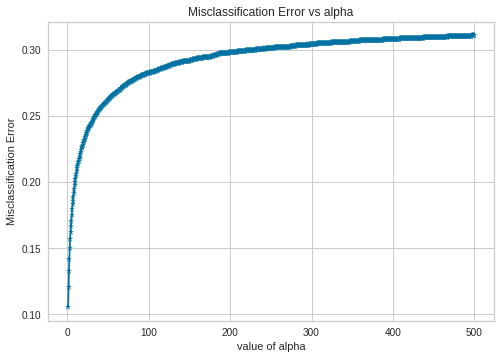

1.0

In [52]:
#Misclassification graph
naive_bayes(X_train, y_train)

In [53]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [54]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [55]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [56]:
pip install plotly==4.14.3

Note: you may need to restart the kernel to use updated packages.


In [57]:
pip install chart_studio

Note: you may need to restart the kernel to use updated packages.


In [58]:
pip install cufflinks

Note: you may need to restart the kernel to use updated packages.


In [59]:
#LSTM modelling
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import Dropout
import re
from nltk.corpus import stopwords
from nltk import word_tokenize
STOPWORDS = set(stopwords.words('english'))
from bs4 import BeautifulSoup
import plotly.graph_objs as go
#import plotly.plotly as py
import chart_studio.plotly as py
import cufflinks
from IPython.core.interactiveshell import InteractiveShell
import plotly.figure_factory as ff
InteractiveShell.ast_node_interactivity = 'all'
from plotly.offline import iplot
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')

In [83]:
# The maximum number of words to be used. (most frequent)

'''
X = Cleanreview_df['lemma_str']
y = Cleanreview_df['Rating']
'''
MAX_NB_WORDS = 50000
# Max number of words in each Review.
MAX_SEQUENCE_LENGTH = 250
# This is fixed.
EMBEDDING_DIM = 100
#, lower=True
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True
                     )
tok=tokenizer
tokenizer.fit_on_texts(Cleanreview_df['lemma_str'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

"\nX = Cleanreview_df['lemma_str']\ny = Cleanreview_df['Rating']\n"

Found 17425 unique tokens.


In [61]:
X = tokenizer.texts_to_sequences(Cleanreview_df['lemma_str'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (9093, 250)


In [62]:
Y = pd.get_dummies(Cleanreview_df['Rating']).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (9093, 3)


In [63]:
X[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [64]:
#X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.30, random_state = 42)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.30,  random_state = 4)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(6365, 250) (6365, 3)
(2728, 250) (2728, 3)


In [65]:
sm = SMOTE(random_state=12)
x_train_res, y_train_res = sm.fit_resample(X_train, Y_train)
x_test_res, y_test_res = (X_test, Y_test)

In [68]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 250, 100)          5000000   
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 250, 100)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 303       
Total params: 5,080,703
Trainable params: 5,080,703
Non-trainable params: 0
_________________________________________________________________
None


In [69]:
epochs = 5
batch_size = 64

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/10
90/90 [==============================] - 52s 545ms/step - loss: 0.6340 - accuracy: 0.8396 - val_loss: 0.4953 - val_accuracy: 0.8571
Epoch 2/10
90/90 [==============================] - 48s 537ms/step - loss: 0.4242 - accuracy: 0.8809 - val_loss: 0.4335 - val_accuracy: 0.8556
Epoch 3/10
90/90 [==============================] - 49s 540ms/step - loss: 0.2931 - accuracy: 0.8921 - val_loss: 0.4416 - val_accuracy: 0.8540
Epoch 4/10
90/90 [==============================] - 48s 538ms/step - loss: 0.2089 - accuracy: 0.9237 - val_loss: 0.4543 - val_accuracy: 0.8619
Epoch 5/10
90/90 [==============================] - 49s 540ms/step - loss: 0.1343 - accuracy: 0.9575 - val_loss: 0.5111 - val_accuracy: 0.8697


In [70]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 1.0, 'model accuracy and loss')

Text(0, 0.5, 'accuracy and loss')

Text(0.5, 0, 'epoch')

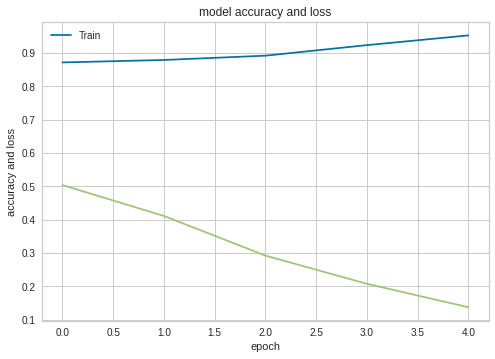

In [71]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy and loss')
plt.ylabel('accuracy and loss')
plt.xlabel('epoch')
plt.legend(['Train'], loc ='upper left')
plt.show()

Text(0.5, 1.0, 'model loss')

Text(0, 0.5, 'loss')

Text(0.5, 0, 'epoch')

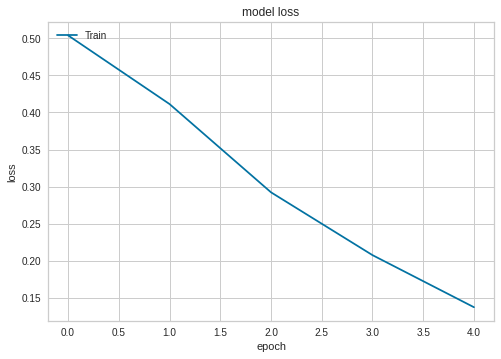

In [72]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train'], loc ='upper left')
plt.show()

In [85]:
print("Loss is",history.history['loss'])
print("Accuracy is",history.history['accuracy'])

Loss is [0.5037927627563477, 0.41127777099609375, 0.29236018657684326, 0.20775292813777924, 0.13757573068141937]
Accuracy is [0.8716829419136047, 0.8790153861045837, 0.891934335231781, 0.9235334992408752, 0.9526885747909546]


In [86]:
#Count of cases by group of rating for good , bad and neutal
Counts=Cleanreview_df.groupby(['Rating']).size()
print(Counts)

Rating
bad         419
good       7981
neutral     693
dtype: int64
